# Modelo de Ising via algoritmo de Metroplis - Atividade de Monte Carlo - Parte 1  
**Aluno: João Victor Campos**  
**Matrícula: 2020035272** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, typed
from typing import Callable

In [14]:
class SpinLattice:
    def __init__(self, L, T, spins):
        self.L = L # lado da rede
        self.N = self.L * self.L # num de spins
        self.T = T # temperatura 
        self.spins = spins # matriz de spins
        self.beta = 1 / self.T
    
    def get_viz(self) -> np.ndarray:
        #self.N = self.L * self.L
        dimension = (self.N, 4)
        self.viz_list = np.zeros(dimension, dtype=np.int16)
        
        for i in range(self.N):
            
            self.viz_list[i,0] = i+1
            if (i+1) % self.L == 0 : 
                self.viz_list[i,0] = i+1-self.L
            
            self.viz_list[i,1] = i+self.L
            if i > (self.N-self.L-1): 
                self.viz_list[i,1] = i + self.L -self.N 
    
            self.viz_list[i,2] = i-1
            if i % self.L == 0: 
                self.viz_list[i,2] = i-1 + self.L 
    
            self.viz_list[i,3] = i-self.L
            if i<self.L: 
                self.viz_list[i,3] = i-self.L+self.N
        return self.viz_list


In [2]:
def random_config(N):
    # atribuir spins a spin_matrix da Classe
    spins = np.random.choice([-1,1] , N)
    return spins

In [3]:
def get_ener_mag(spins, viz):
    N = spins.size
    ener = 0
    for i in range(N):
        h = spins[viz[i,0]] + spins[viz[i, 1]]
        ener -= spins[i]*h
        mag = np.sum(spins)
    return ener, mag

In [4]:
@jit(nopython=True)
def monte_carlo_step(S: np.ndarray, viz: np.ndarray, ex: typed.Dict, ener: float, mag: int | float):
    for i in range(S.size):
        # Random site index    
        k = np.random.randint(S.size)

        h = S[viz[k,0]] + S[viz[k,1]] + S[viz[k,2]] + S[viz[k,3]]
        delta_E = 2*S[k]*h

        if np.random.rand() < ex[delta_E]:
            S[k] = -S[k]
            ener = ener + delta_E
            mag = np.sum(S)
    return S, ener, mag

In [5]:
def create_exp_dict(beta):
    ex = typed.Dict()
    ex[-8] = np.exp(8.0 * beta)
    ex[-4] = np.exp(4.0 * beta)
    ex[0] = 1.0
    ex[4] = np.exp(-4.0 * beta)
    ex[8] = np.exp(-8.0 * beta)
    return ex

In [6]:
def make_subplots(energy_vecs: list[list], mag_vecs:list[list]):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    for i in range(len(energy_vecs)):
        ax1.plot(energy_vecs[i])
    ax1.set_ylabel("Energia")
    ax1.set_xlabel("Passos de MC")


    for j in range(len(mag_vecs)):
        ax2.plot(mag_vecs[j])
    ax2.set_xlabel("Passos de MC")
    ax2.set_ylabel("Magnetização")
    plt.tight_layout()

## Tamanho 32 e Temperatura 1.5

In [54]:
NUM_CONFIGS = 20
ENERGY_CONTAINER = []
MAG_CONTAINER = []
for j in range(NUM_CONFIGS):
    Rede1 = SpinLattice(L=32, T=1.5, spins=random_config(32*32))
    ex = create_exp_dict(Rede1.beta)

    # Pegar a primeira energia e mag
    ener, mag = get_ener_mag(Rede1.spins, Rede1.get_viz())

    monte_carlo_steps = 1_200

    Energias_Rede1 = []
    Mags_Rede1 = []

    for _ in range(monte_carlo_steps):
        spins, ener, mag = monte_carlo_step(S=Rede1.spins, 
                                            viz=Rede1.get_viz(),
                                            ex=ex,
                                            ener=ener,
                                            mag=mag)
        Energias_Rede1.append(ener)
        Mags_Rede1.append(mag)

    ENERGY_CONTAINER.append(Energias_Rede1)
    MAG_CONTAINER.append(Mags_Rede1)

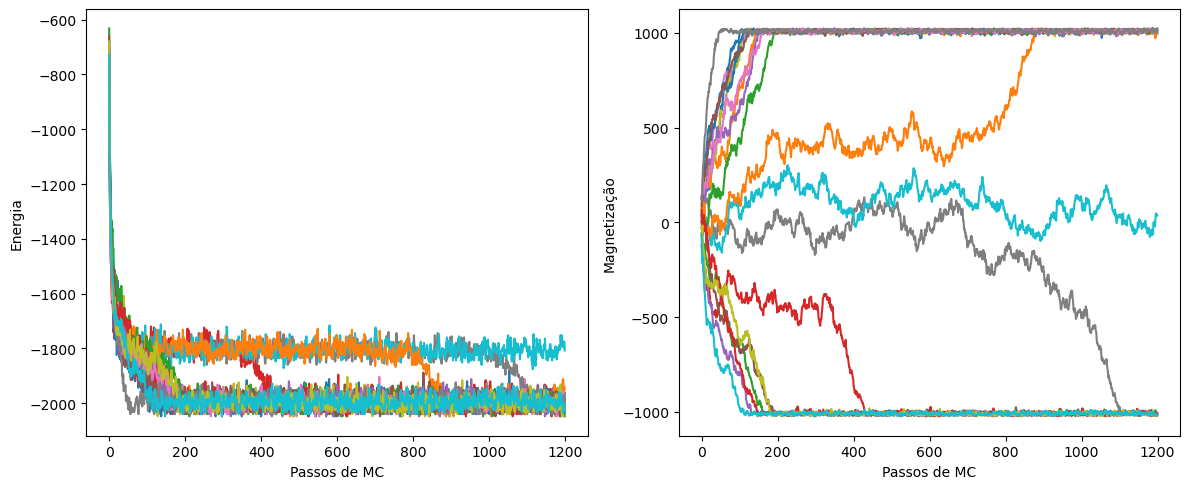

In [71]:
make_subplots(energy_vecs=ENERGY_CONTAINER, mag_vecs=MAG_CONTAINER)

No exemplo acima que utilizou os parâmetros das notas de aula como base, verifica-se comportamento semelhante ao exposto. A energia para a maioria termaliza perto dos 500 passos, mas algumas demoram mais. Ainda, há uma das configurações iniciais que não termalizou com os 1200 passos de monte carlo.

## Tamanho 32 e Temperatura 0.5

In [74]:
NUM_CONFIGS = 20
ENERGY_CONTAINER = []
MAG_CONTAINER = []
for j in range(NUM_CONFIGS):
    Rede1 = SpinLattice(L=32, T=0.5, spins=random_config(32*32))
    ex = create_exp_dict(Rede1.beta)

    # Pegar a primeira energia e mag
    ener, mag = get_ener_mag(Rede1.spins, Rede1.get_viz())

    monte_carlo_steps = 1_200

    Energias_Rede1 = []
    Mags_Rede1 = []

    for _ in range(monte_carlo_steps):
        spins, ener, mag = monte_carlo_step(S=Rede1.spins, 
                                            viz=Rede1.get_viz(),
                                            ex=ex,
                                            ener=ener,
                                            mag=mag)
        Energias_Rede1.append(ener)
        Mags_Rede1.append(mag)

    ENERGY_CONTAINER.append(Energias_Rede1)
    MAG_CONTAINER.append(Mags_Rede1)

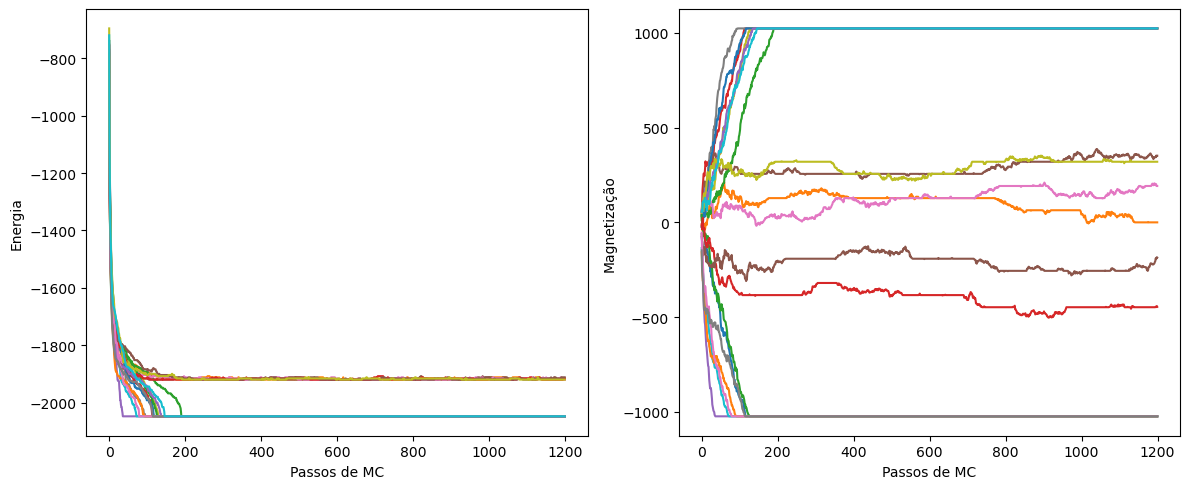

In [75]:
make_subplots(energy_vecs=ENERGY_CONTAINER, mag_vecs=MAG_CONTAINER)

## Tamanho 32 e Temperatura 2.0

In [78]:
NUM_CONFIGS = 20
ENERGY_CONTAINER = []
MAG_CONTAINER = []
for j in range(NUM_CONFIGS):
    Rede1 = SpinLattice(L=32, T=2.0, spins=random_config(32*32))
    ex = create_exp_dict(Rede1.beta)

    # Pegar a primeira energia e mag
    ener, mag = get_ener_mag(Rede1.spins, Rede1.get_viz())

    monte_carlo_steps = 1_200

    Energias_Rede1 = []
    Mags_Rede1 = []

    for _ in range(monte_carlo_steps):
        spins, ener, mag = monte_carlo_step(S=Rede1.spins, 
                                            viz=Rede1.get_viz(),
                                            ex=ex,
                                            ener=ener,
                                            mag=mag)
        Energias_Rede1.append(ener)
        Mags_Rede1.append(mag)

    ENERGY_CONTAINER.append(Energias_Rede1)
    MAG_CONTAINER.append(Mags_Rede1)

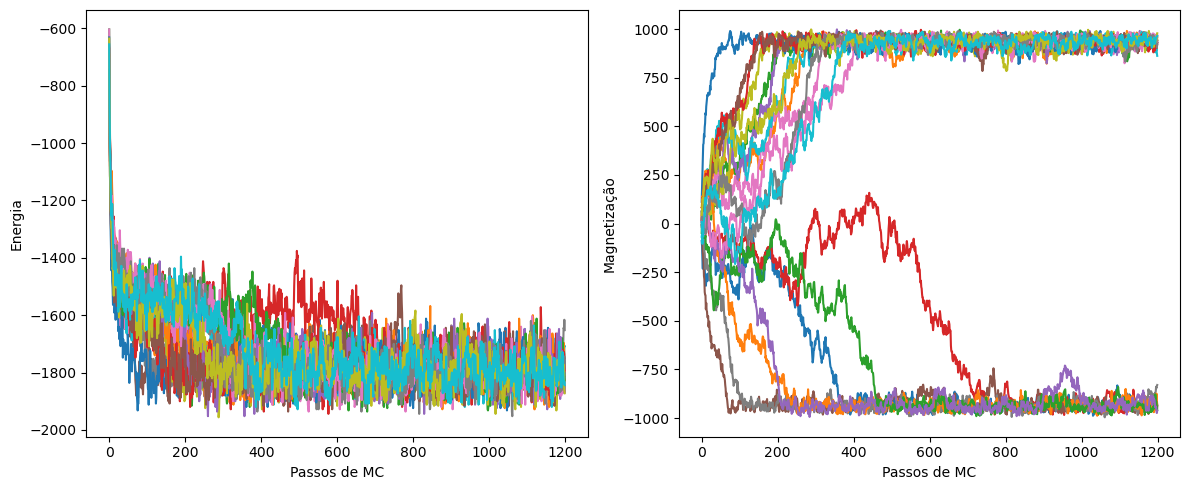

In [79]:
make_subplots(energy_vecs=ENERGY_CONTAINER, mag_vecs=MAG_CONTAINER)

Mantendo o mesmo tamanho mas aumentando a temperatura, a flutuação de energia é **bem maior**.

## Tamanho 50 e Temperatura 1.2

In [81]:
NUM_CONFIGS = 10
ENERGY_CONTAINER = []
MAG_CONTAINER = []
for j in range(NUM_CONFIGS):
    Rede1 = SpinLattice(L=50, T=1.2, spins=random_config(50*50))
    ex = create_exp_dict(Rede1.beta)

    # Pegar a primeira energia e mag
    ener, mag = get_ener_mag(Rede1.spins, Rede1.get_viz())

    monte_carlo_steps = 1_000

    Energias_Rede1 = []
    Mags_Rede1 = []

    for _ in range(monte_carlo_steps):
        spins, ener, mag = monte_carlo_step(S=Rede1.spins, 
                                            viz=Rede1.get_viz(),
                                            ex=ex,
                                            ener=ener,
                                            mag=mag)
        Energias_Rede1.append(ener)
        Mags_Rede1.append(mag)

    ENERGY_CONTAINER.append(Energias_Rede1)
    MAG_CONTAINER.append(Mags_Rede1)

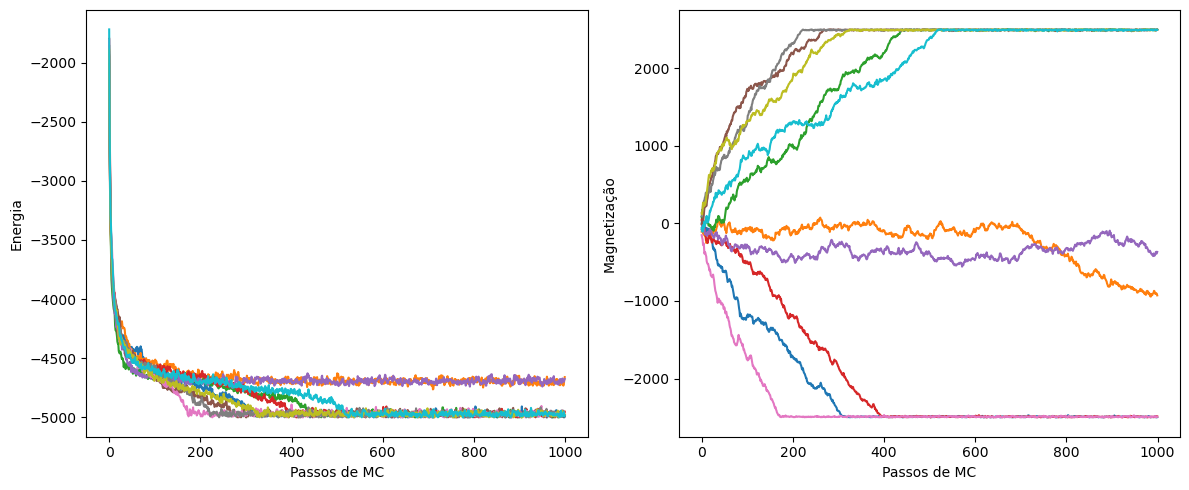

In [82]:
make_subplots(energy_vecs=ENERGY_CONTAINER, mag_vecs=MAG_CONTAINER)

Nessa simulação com o tamanho de 50, vê-se que das 10 configurações, 2 delas (roxo e laranja) não foram capazes de termalizar a magnetização e o mesmo vale para a energia. No geral por volta de 500 passos todas haviam termalizado exceto por essas citadas.